# PREPROCESSING

In [54]:
import pandas as pd
df = pd.read_csv('heart_data.csv')

print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

## CHECKING FOR NULL VALUES

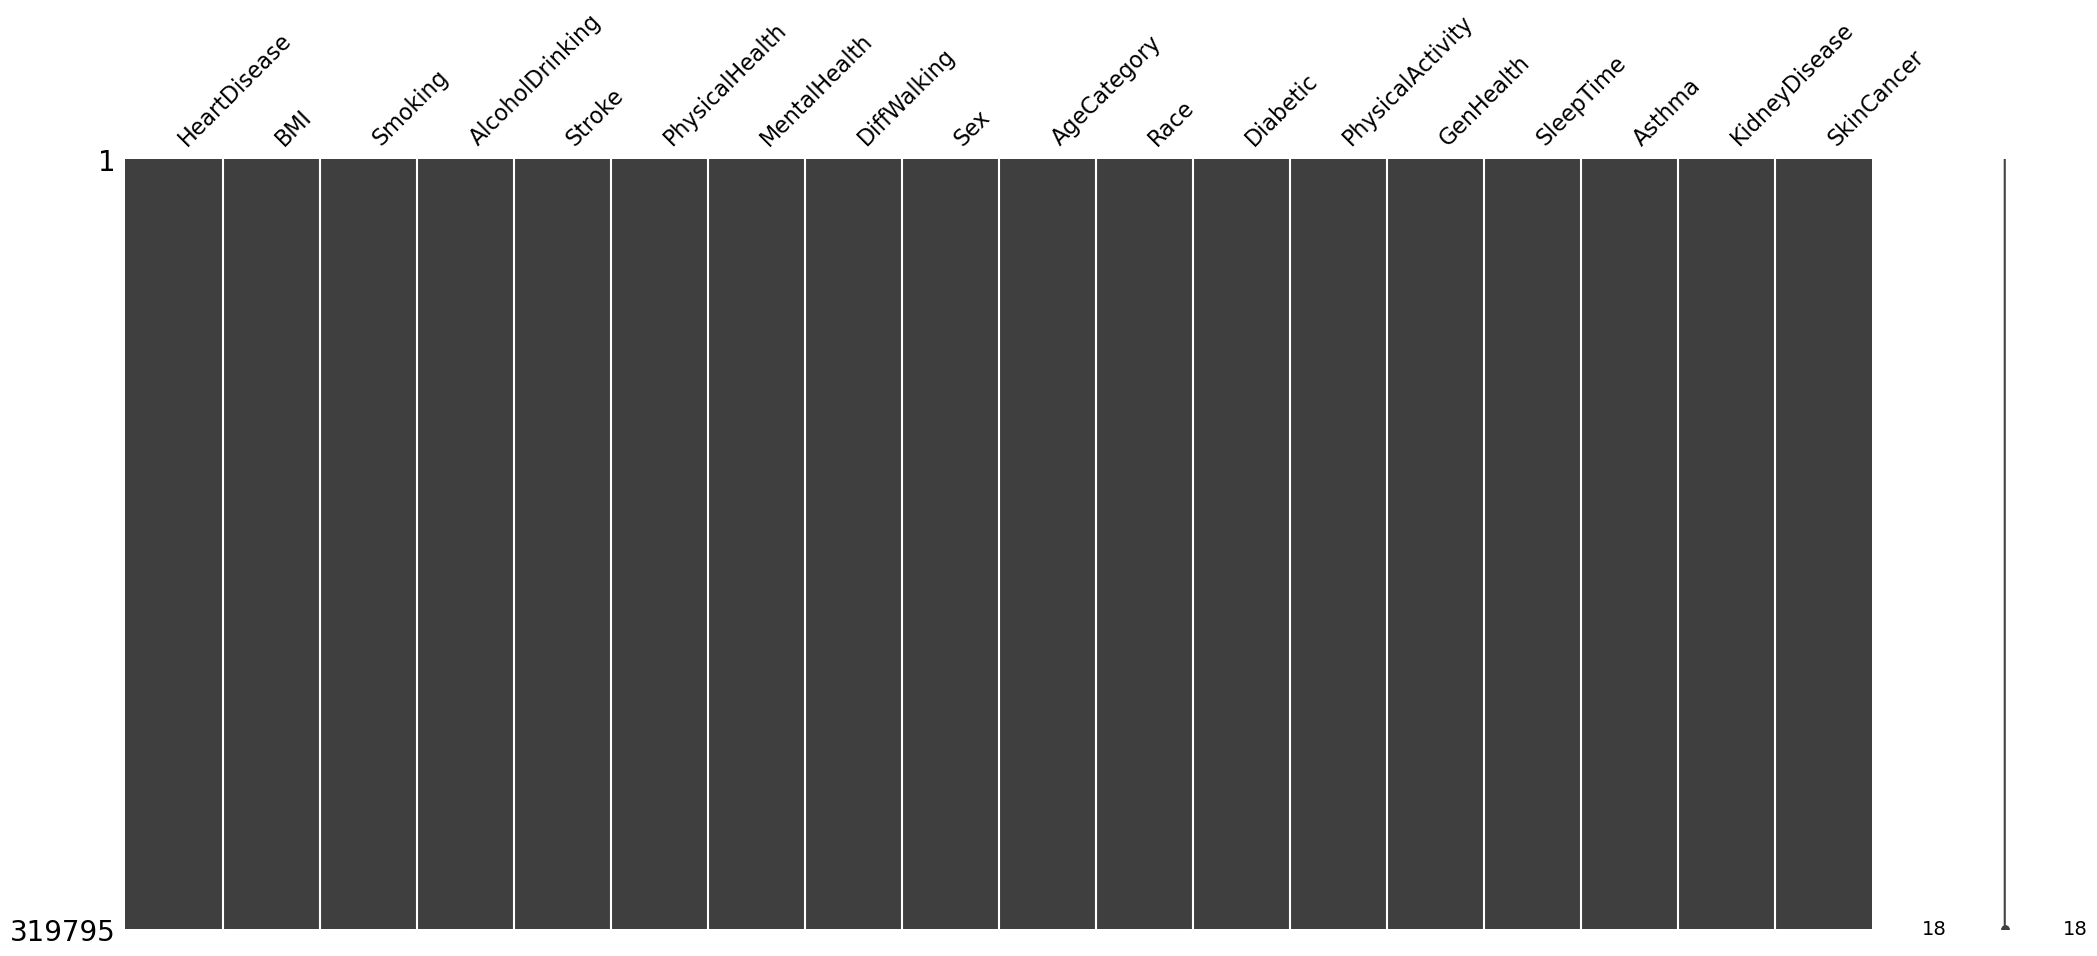

<Figure size 1500x900 with 0 Axes>

In [55]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.figure(figsize=(15, 9 ))
plt.show()


## CHECK AND EQUALISE COUNT OF BINARY OUTPUT

C:\Users\deane\AppData\Local\Temp\ipykernel_16656\1273517605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


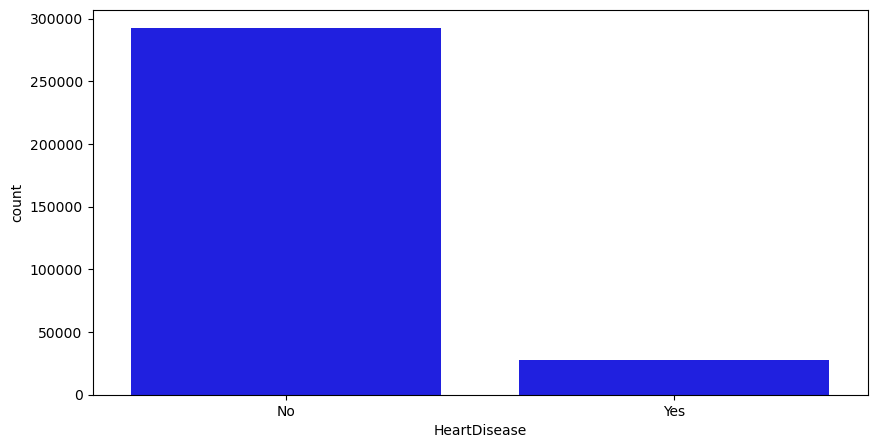

In [56]:
import seaborn as sns
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()


In [57]:
# Calculate the number of rows to delete
num_rows_to_delete = int(0.92 * len(df[df['HeartDisease'] == 'No']))

# Get indices of rows where HeartDisease is "No"
indices_to_delete = df[df['HeartDisease'] == 'No'].sample(n=num_rows_to_delete).index

# Drop rows by indices
df.drop(indices_to_delete, inplace=True)

C:\Users\deane\AppData\Local\Temp\ipykernel_16656\3497551675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])


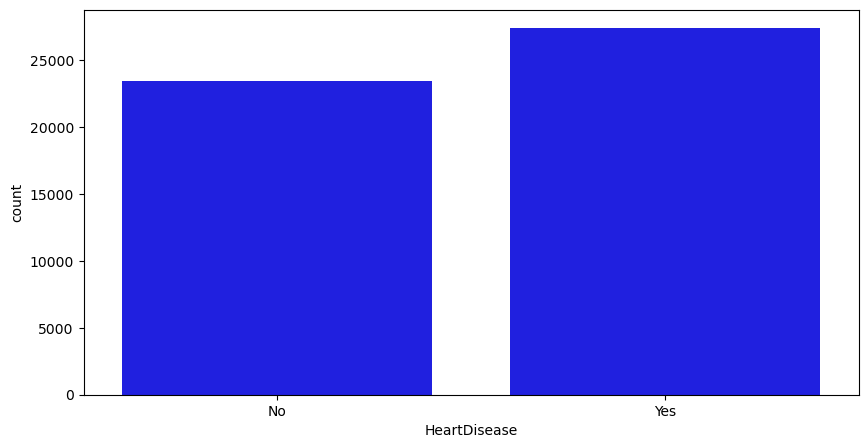

In [58]:
plt.figure(figsize=(10,5))
custom_palette = ["#0000ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, order = ['No', 'Yes'])
plt.show()

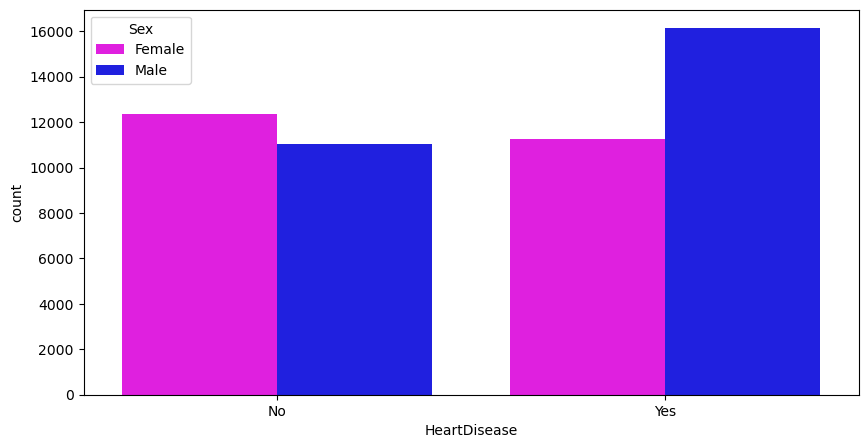

In [59]:
import seaborn as sns

plt.figure(figsize=(10,5))
custom_palette = ["#ff00ff", "#0000ff"]  
sns.countplot(data=df, x='HeartDisease', palette=custom_palette, hue='Sex', order = ['No', 'Yes'])
plt.show()

## CONVERT ALL CATEGORICAL DATA TO NUMERICAL DATA USING INDICES

In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()    
# corr_matrix = df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues')
# plt.show()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0
23,0,25.82,1,0,0,0.0,30.0,0,1,12,5,2,1,1,8.0,0,0,0
29,0,36.58,0,0,0,0.0,0.0,0,0,8,5,2,0,2,5.0,0,0,1
35,1,32.98,1,0,1,10.0,0.0,1,1,11,5,2,1,3,4.0,0,0,1


# DATA VISUALISATION

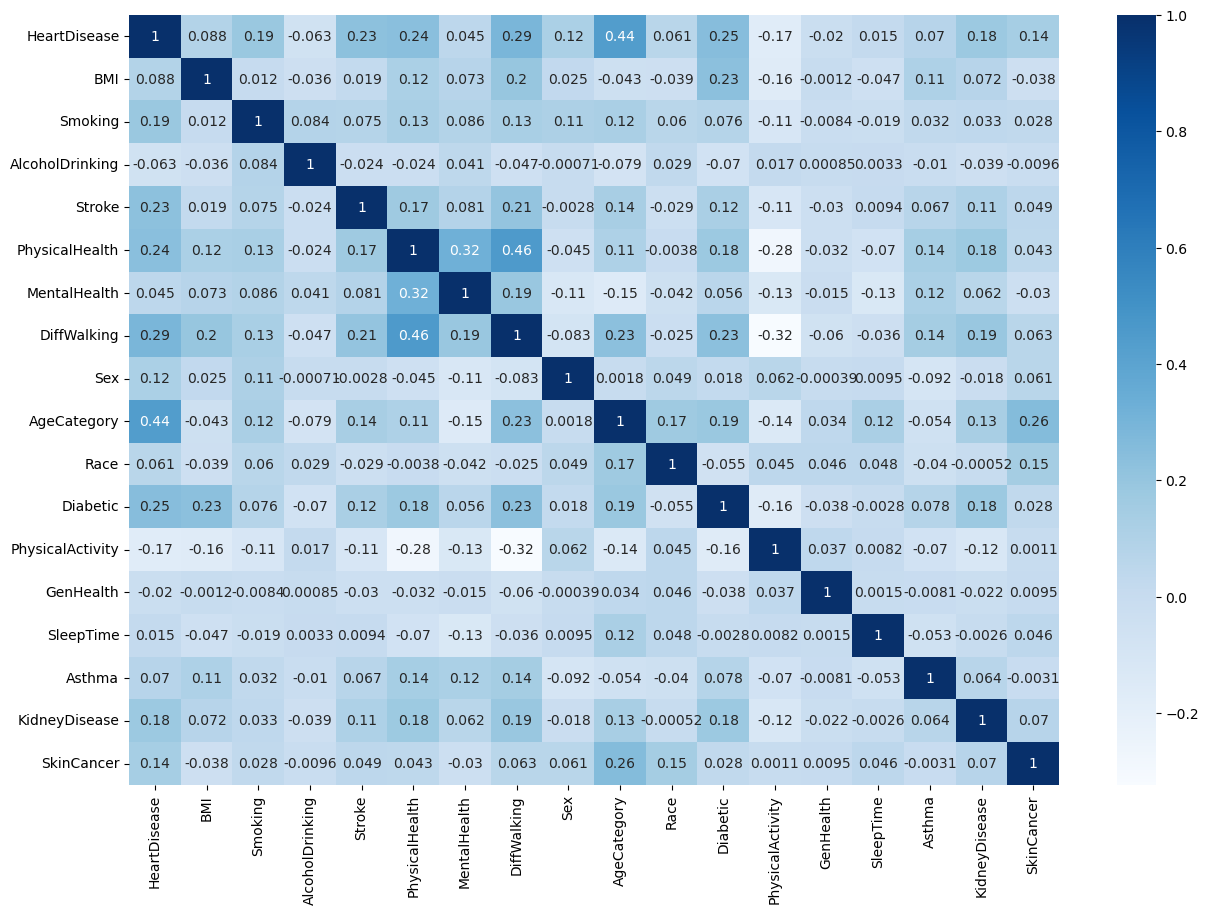

In [61]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

# REGRESSION MODELS

In [62]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on testing set (using all features):", accuracy)
# N = 10
# feature_importances = rf_model.feature_importances_

# # Select most important features
# top_n_features_indices = feature_importances.argsort()[::-1][:N]
# top_n_features_names = X.columns[feature_importances.argsort()[::-1][:N]]


# print("Top", N, "most important features:")
# for index, feature_name in zip(top_n_features_indices, top_n_features_names):
#     print("Index:", index, " - Feature:", feature_name)
# X_train_selected = X_train.iloc[:, top_n_features_indices]
# X_test_selected = X_test.iloc[:, top_n_features_indices]

# # train the Random Forest classifier with selected features
# rf_model_selected = RandomForestClassifier(n_estimators=600, random_state=42)  
# rf_model_selected.fit(X_train_selected, y_train)

# # Predictions on the testing set using selected features
# y_pred_selected = rf_model_selected.predict(X_test_selected)

# accuracy_selected = accuracy_score(y_test, y_pred_selected)
# print("Accuracy on testing set (using selected features):", accuracy_selected)

In [63]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# logistic_model = LogisticRegression(max_iter=10000, random_state=42)

# logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on testing set (using all features):", accuracy)


In [64]:

# from sklearn.naive_bayes import GaussianNB

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# naive_bayes_model = GaussianNB()
# naive_bayes_model.fit(X_train, y_train)
# y_pred = naive_bayes_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on testing set (using all features):", accuracy)

In [65]:

# from sklearn.neural_network import MLPClassifier

# # Features (X) and target variable (y)
# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (200,)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# # Initialize the MLP classifier
# mlp_model = MLPClassifier(random_state=42)

# # Perform grid search
# grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on testing set (using all features):", accuracy)


In [66]:
# from sklearn.neural_network import MLPClassifier

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# mlp_model = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', alpha=0.01, random_state=42, max_iter=1000)

# mlp_model.fit(X_train, y_train)
# y_pred = mlp_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on testing set (using all features):", accuracy)


In [67]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import precision_recall_curve

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the MLP classifier
# mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# # Fit the model
# mlp_model.fit(X_train, y_train)

# y_proba = mlp_model.predict_proba(X_test)[:, 1]
# precision, recall, _ = precision_recall_curve(y_test, y_proba)

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.grid(True)
# plt.show()


In [68]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
#             xticklabels=['No Disease', 'Disease'], 
#             yticklabels=['No Disease', 'Disease'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [69]:
# from sklearn.neighbors import KNeighborsClassifier

# X = df.drop(columns=['HeartDisease']) 
# y = df['HeartDisease']  

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ks = []
# for i in range(1, 20):
#     knn_model = KNeighborsClassifier(n_neighbors=i)

#     knn_model.fit(X_train, y_train)

#     y_pred = knn_model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     ks.append(accuracy)
#     print(f"{i}: {accuracy}")

# print("Accuracy on testing set:", max(ks))
# ks

In [70]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

#df_reduced = df.sample(frac=0.1, random_state=42)

# # Define a grid of hyperparameters to search over
# param_grid = {
#     'n_estimators': [100, 150, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [5, 10, 15]
# }

# Generate synthetic data for heart disease prediction
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(n_samples) * 2  # True relationship + noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Calculate mean squared error (MSE)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# [CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   3.8s
# ...
# [CV] END ..learning_rate=0.2, max_depth=15, n_estimators=200; total time=  56.9s
# Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
# Accuracy on testing set with best model: 0.7694504628717747



ImportError: cannot import name 'accuracy_score' from 'sklearn.base' (c:\Users\deane\anaconda3\envs\DAML\lib\site-packages\sklearn\base.py)

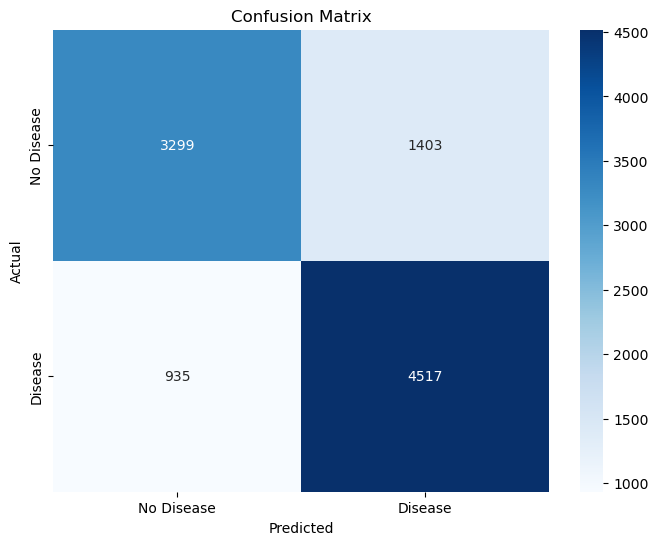

In [ ]:

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()